In [53]:
import pandas as pd
import matplotlib.pyplot as plt

In [55]:
df = pd.read_csv("Datos+Meteorológicos_Arg_2023.csv")
df.head(10)

,Fecha,Ciudad,Temperatura Maxima,Temperatura Minima,Precipitacion,Velocidad del Viento,Humedad Relativa
0,1/1/2023,Buenos Aires,27,18,0.0,22.7,68.8
1,1/1/2023,Cordoba,35,18,0.0,33.8,61.7
2,1/1/2023,Rosario,23,21,0.0,10.6,80.0
3,1/1/2023,Mendoza,35,21,0.0,23.8,76.8
4,1/1/2023,Tucuman,36,18,17.2,25.7,54.9
5,2/1/2023,Buenos Aires,31,15,0.0,10.6,67.1
6,2/1/2023,Cordoba,32,20,0.0,20.8,56.2
7,2/1/2023,Rosario,23,17,0.0,16.3,37.7
8,2/1/2023,Mendoza,34,19,0.0,39.7,36.1
9,2/1/2023,Tucuman,28,19,0.0,24.0,44.7


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Fecha                 1825 non-null   object 
 1   Ciudad                1825 non-null   object 
 2   Temperatura Maxima    1825 non-null   int64  
 3   Temperatura Minima    1825 non-null   int64  
 4   Precipitacion         1825 non-null   float64
 5   Velocidad del Viento  1825 non-null   float64
 6   Humedad Relativa      1825 non-null   float64
dtypes: float64(3), int64(2), object(2)
memory usage: 99.9+ KB


In [11]:
df.describe()

,Temperatura Maxima,Temperatura Minima,Precipitacion,Velocidad del Viento,Humedad Relativa
count,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000
mean,17.827945,10.191233,11.469205,24.963945,59.251890
std,8.139477,6.540120,27.714274,8.640341,17.282792
min,2.000000,-3.000000,0.000000,10.000000,30.000000
25%,12.000000,6.000000,0.000000,17.900000,44.400000
50%,17.000000,10.000000,0.000000,24.900000,58.200000
75%,23.000000,15.000000,0.000000,32.300000,74.800000
max,36.000000,22.000000,119.500000,40.000000,90.000000


In [57]:
## Cambiar formato fecha
df["Fecha"] = pd.to_datetime(df["Fecha"], format = "%d/%m/%Y")

In [19]:
df

,Fecha,Ciudad,Temperatura Maxima,Temperatura Minima,Precipitacion,Velocidad del Viento,Humedad Relativa
0,2023-01-01,Buenos Aires,27,18,0.0,22.7,68.8
1,2023-01-01,Cordoba,35,18,0.0,33.8,61.7
2,2023-01-01,Rosario,23,21,0.0,10.6,80.0
3,2023-01-01,Mendoza,35,21,0.0,23.8,76.8
4,2023-01-01,Tucuman,36,18,17.2,25.7,54.9
...,...,...,...,...,...,...,...
1820,2023-12-31,Buenos Aires,15,12,0.0,17.9,49.2
1821,2023-12-31,Cordoba,15,7,0.0,17.8,62.4
1822,2023-12-31,Rosario,14,8,0.0,38.2,31.2
1823,2023-12-31,Mendoza,13,9,84.8,27.6,35.3


In [59]:
lista_ciudades = []
for c in df['Ciudad']:
    if c not in lista_ciudades:
        lista_ciudades.append(c)
lista_ciudades

['Buenos Aires', 'Cordoba', 'Rosario', 'Mendoza', 'Tucuman']

In [61]:
dic_mes = {
    1:'Enero',
     2:'Febrero',
     3:'Marzo',
     4:'Abril',
     5:'Mayo',
     6:'Junio',
     7:'Julio',
     8:'Agosto',
     9:'Septiembre',
     10:'Octubre',
     11:'Noviembre',
      12:'Diciembre'
}

In [85]:
def consultar_temeparturas():
    while True:
        # Solicitar la ciudad
        print("\nCiudades disponibles: ", lista_ciudades)
        ciudad_elegida = input("Elija la ciudad de la lista: ").title()
        
        # Solicitar el mes
        mes_elegida = int(input("Elija un número de mes (p.ejem Enero = 1): "))
        
        # Validar los input
        if ciudad_elegida not in lista_ciudades or mes_elegida not in range(1,13):
            print("Ciudad o mes no valido. Inténtelo nuevamente.")
            continue

        # Crear el dataframe filtrado
        datos_ciudad_mes = df[(df['Ciudad']==ciudad_elegida) & (df['Fecha'].dt.month==mes_elegida) ]
    
        # Graficar las temperaturas del dataframe
        plt.figure(figsize = (10,6))
        plt.plot(datos_ciudad_mes['Fecha'], datos_ciudad_mes['Temperatura Maxima'], label = 'Maxima', color = 'red')
        plt.plot(datos_ciudad_mes['Fecha'], datos_ciudad_mes['Temperatura Minima'], label = 'Minima', color = 'blue')
        plt.title(f"temperatura en {ciudad_elegida} durante el mes de {dic_mes[mes_elegida]}")
        plt.xlabel("Fecha")
        plt.ylabel("Temperaturas")
        plt.legend()
        plt.xticks(rotation = 45)
        plt.show()
    
        # Pregutar al usuario si quiere continuar
        otra_consulta = input("¿Deseas continuar consultando? (s/n): ")
        if otra_consulta.lower() != 's':
            break


Ciudades disponibles:  ['Buenos Aires', 'Cordoba', 'Rosario', 'Mendoza', 'Tucuman']


Elija la ciudad de la lista:  Mendoza
Elija un número de mes (p.ejem Enero = 1):  4


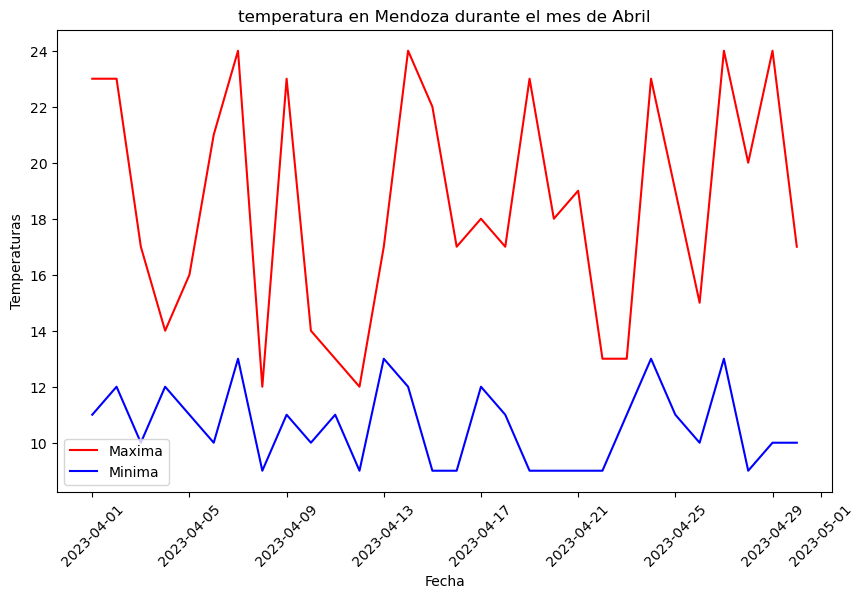

¿Deseas continuar consultando? (s/n):  s



Ciudades disponibles:  ['Buenos Aires', 'Cordoba', 'Rosario', 'Mendoza', 'Tucuman']


Elija la ciudad de la lista:  Tucuman
Elija un número de mes (p.ejem Enero = 1):  8


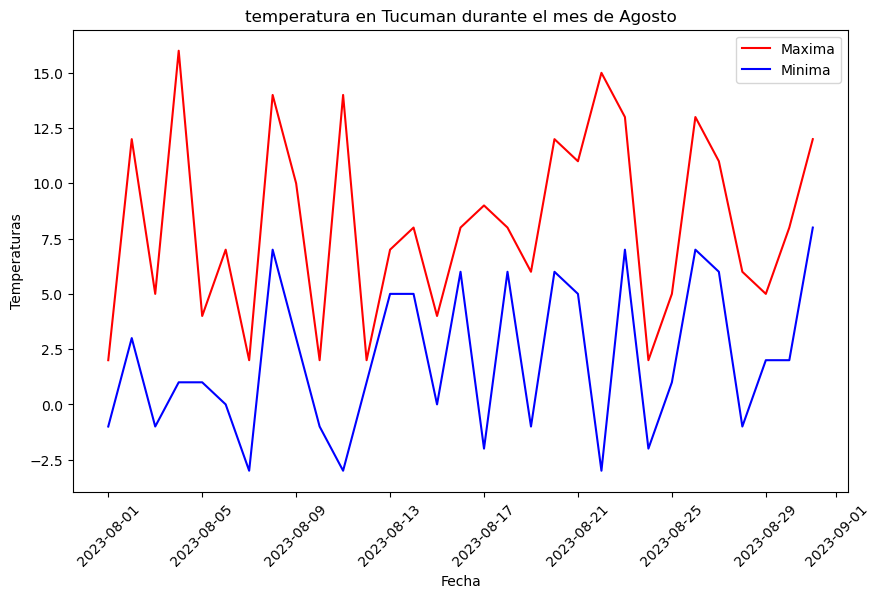

¿Deseas continuar consultando? (s/n):  n


In [87]:
consultar_temeparturas()